In [53]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import numpy as np
# os.listdir('data')


In [4]:

gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
# Avoid out of memory error
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### Remove dodgy images corrupted or different extension


In [7]:
import cv2 #opencv
import imghdr

datadir = 'D:/kaggle/image_classification/data'
img = cv2.imread(os.path.join(datadir,'excited',"7b1b2c4f6fdc657236009959116c23be.jpg"))


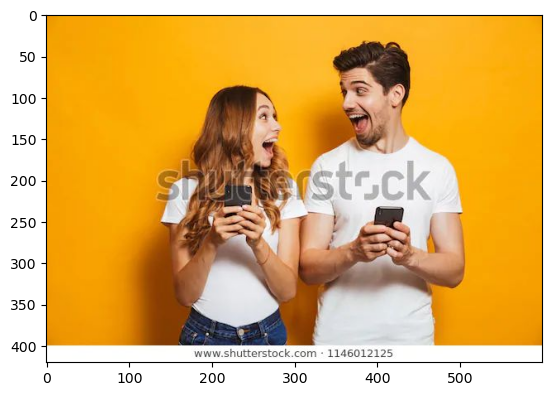

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
image_exts = ['jpeg','jpg','bmp','png']
image_exts[0]


'jpeg'

In [10]:
for image_class in os.listdir(datadir):
    for image in os.listdir(os.path.join(datadir,image_class)):
        image_path = os.path.join(datadir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
                    print('Issue with image {}'.format(image_patj))

### Load data

In [11]:
tf.data.Dataset#this is an api for automatic tasks input,cleaning

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [12]:
# tf.data.Dataset.list_files
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory(datadir)
# using keras utils
#image data set auto build with some preprocessing

Found 305 files belonging to 2 classes.


In [14]:
tf.keras.utils.image_dataset_from_directory??

In [15]:
data_iterator = data.as_numpy_iterator()
# Returns an iterator which converts all elements
# of the dataset to numpy.

In [16]:
data_iterator

In [17]:
batch = data_iterator.next() # to get another batch from iterator

In [18]:
batch[0].shape #images in numpy arrays
batch[1] # excited or afraid
# 1 means excited and 0 means afraid

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

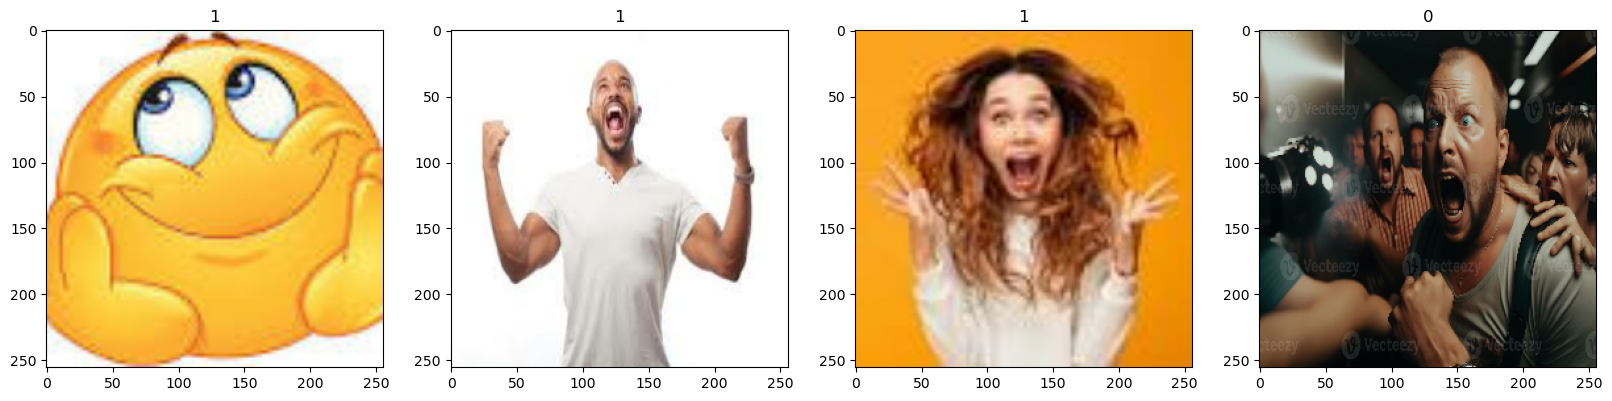

In [19]:
fig, ax = plt.subplots(ncols = 4,figsize=(20,20))
for idx ,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preproccessing

In [20]:
batch[0].shape

(32, 256, 256, 3)

In [21]:
batch[0].max()

255.0

In [22]:
batch[1]

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [23]:
# Using pipeline
data = data.map(lambda x,y:(x/255,y))

In [24]:
scaled_iterator = data.as_numpy_iterator().next()

In [25]:
scaled_iterator[0].max()

1.0

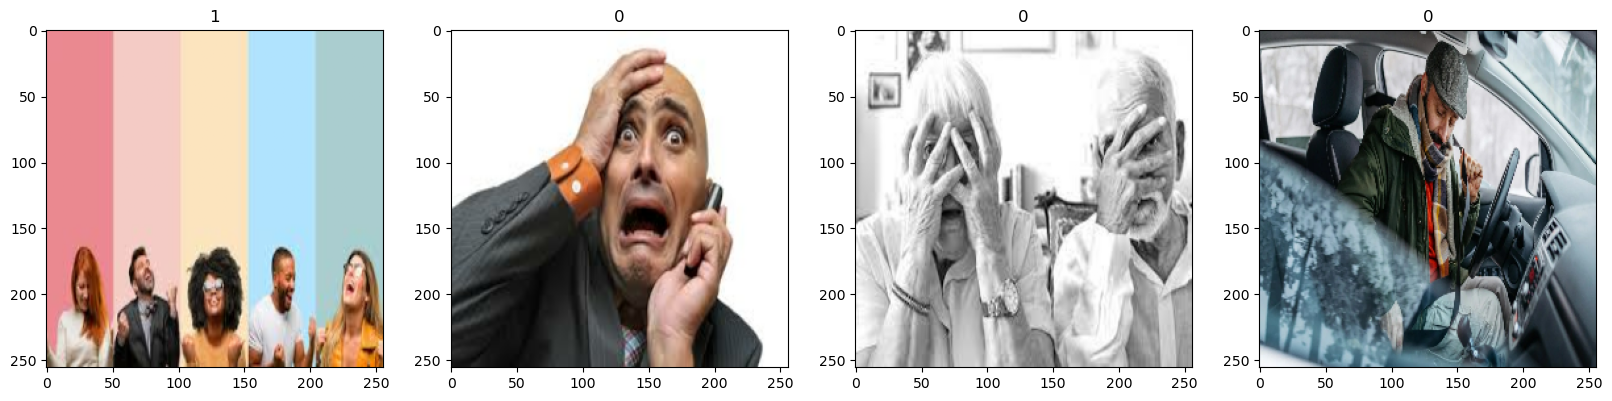

In [26]:
fig, ax = plt.subplots(ncols = 4,figsize=(20,20))
for idx ,img in enumerate(scaled_iterator[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_iterator[1][idx])

### splitting Data

In [27]:
len(data)

10

In [28]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [29]:
test_size

1

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [31]:
len(val)

2

## Deep model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = [
    'accuracy'
])

In [36]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train

In [37]:
logdir = 'logs'

In [38]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [39]:
hist = model.fit(train,epochs = 15, validation_data = val,callbacks = [tensorboard_callback])

Epoch 1/15
7/7 [==============================] - 11s 1s/step - loss: 0.7350 - accuracy: 0.5223 - val_loss: 0.6402 - val_accuracy: 0.4531
Epoch 2/15
7/7 [==============================] - 9s 1s/step - loss: 0.6045 - accuracy: 0.5938 - val_loss: 0.5677 - val_accuracy: 0.5938
Epoch 3/15
7/7 [==============================] - 9s 1s/step - loss: 0.5624 - accuracy: 0.6562 - val_loss: 0.4442 - val_accuracy: 0.7812
Epoch 4/15
7/7 [==============================] - 9s 1s/step - loss: 0.4188 - accuracy: 0.8304 - val_loss: 0.2798 - val_accuracy: 0.9375
Epoch 5/15
7/7 [==============================] - 9s 1s/step - loss: 0.4113 - accuracy: 0.8170 - val_loss: 0.2707 - val_accuracy: 0.9531
Epoch 6/15
7/7 [==============================] - 9s 1s/step - loss: 0.2848 - accuracy: 0.8884 - val_loss: 0.2055 - val_accuracy: 0.9375
Epoch 7/15
7/7 [==============================] - 9s 1s/step - loss: 0.2024 - accuracy: 0.9375 - val_loss: 0.1845 - val_accuracy: 0.9375
Epoch 8/15
7/7 [========================

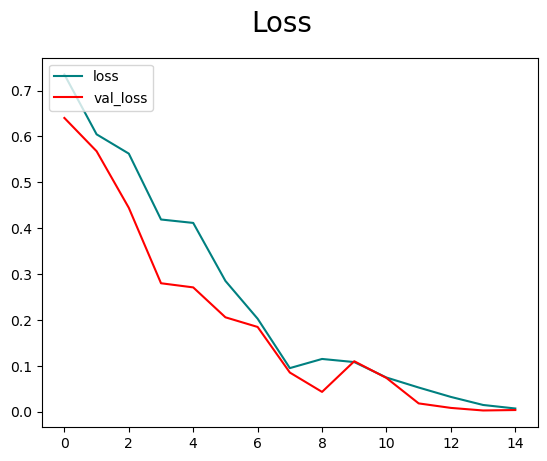

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'red',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

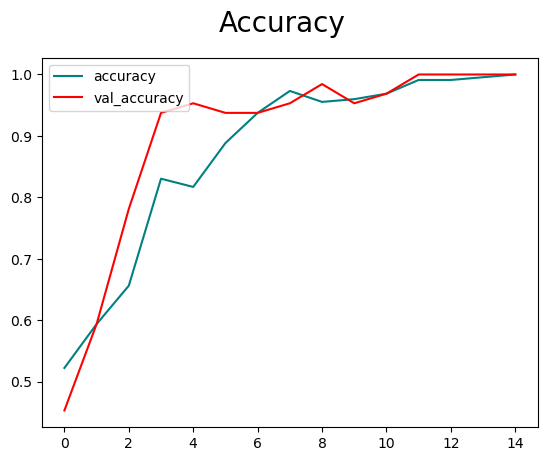

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'red',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate performance

In [42]:
from tensorflow.keras.metrics import Precision,Recall, BinaryAccuracy

In [43]:
p = Precision()
r = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    p.update_state(y,yhat)
    r.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 336ms/step


In [45]:
print(f'precision = {p.result()} , recall = {r.result()}, accuracy = {acc.result()}')

precision = 1.0 , recall = 1.0, accuracy = 1.0


## Predict

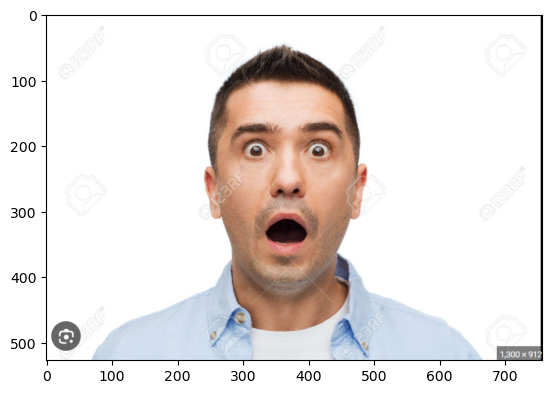

In [58]:
img1 = cv2.imread("C:/Users/jaibh/OneDrive/Desktop/afraid.png")
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

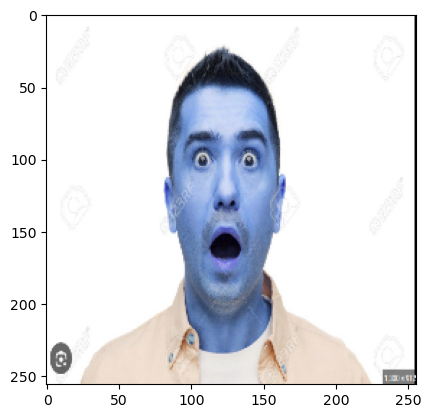

In [59]:
resized = tf.image.resize(img1,(256,256))
plt.imshow(resized.numpy().astype(int))
plt.show()

In [60]:

ypred = model.predict(np.expand_dims(resized/255,0))
# yhat = model.predict(np.expand_dims(resize/255, 0))
ypred

1/1 [==============================] - 0s 48ms/step


array([[0.9981721]], dtype=float32)

In [61]:
if ypred<.5:
    print('excited one')
else:
    print('Afraid one')

Afraid one


## Save the model

In [66]:
from tensorflow.keras.models import load_model

model.save(os.path.join('models','imageclassifier.h5'))

new_model = load_model("D:/kaggle/image_classification/model/imageclassifier.h5")

new_model.predict(np.expand_dims(resized/255, 0))

1/1 [==============================] - 0s 135ms/step


array([[0.9981721]], dtype=float32)